In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%matplotlib inline

<img src='http://www.alternativesjournal.ca/sites/default/files/article/Untitled-3-01.jpg' \>

In [2]:
A11 = np.array([[0.4, 0.2], [0.1, 0.2]])
A12 = np.array([[0.3, 0.2]]).T
A21 = np.array([[0.2, 0.3]])
A22 = np.array([0.5])

B1 = np.array([[0.2, 0.3], [0.7, 0.8]])
B2 = np.array([[0.1, 0]]).T

x1_0 = np.array([[1700, 1000]]).T

def c1(t): return np.array([1000, 500]) * np.exp(0.05*t)
c2 = 100

bounds = [0, 1.2]
t = np.linspace(*bounds, 100)

$$ A_1 = A_{11} + A_{12} (E - A_{22})^{-1} A_{21} $$
$$ B = B_1 + B_2 (E - A_{22})^{-1} A_{21} $$
$$ c(t) = c_1(t) - c_2 (A_{12} (E - A_{22})^{-1})^T $$

In [3]:
A22_neg_inv = np.linalg.inv(np.eye(1) - A22)
A1 = A11 + A12 @ A22_neg_inv @ A21
B = B1 + B2 @ A22_neg_inv @ A21

def c(t):
    return c1(t) - np.dot(A22_neg_inv.T, A12.T).reshape(A12.shape[0]) * c2

$$ \frac{dx}{dt} = B^{-1} (E - A_1) x - B^{-1} c(t)$$

In [4]:
B_inv = np.linalg.inv(B)
A1_neg_inv = np.linalg.inv(np.eye(A1.shape[0]) - A1)

def x_der(t, x):
    return B_inv @ x - B_inv @ A1 @ x - B_inv @ c(t)

In [5]:
x1 = solve_ivp(x_der, bounds, x1_0.reshape(2), t_eval=t).y
x2 = A22_neg_inv @ (A21 @ x1 - c2)

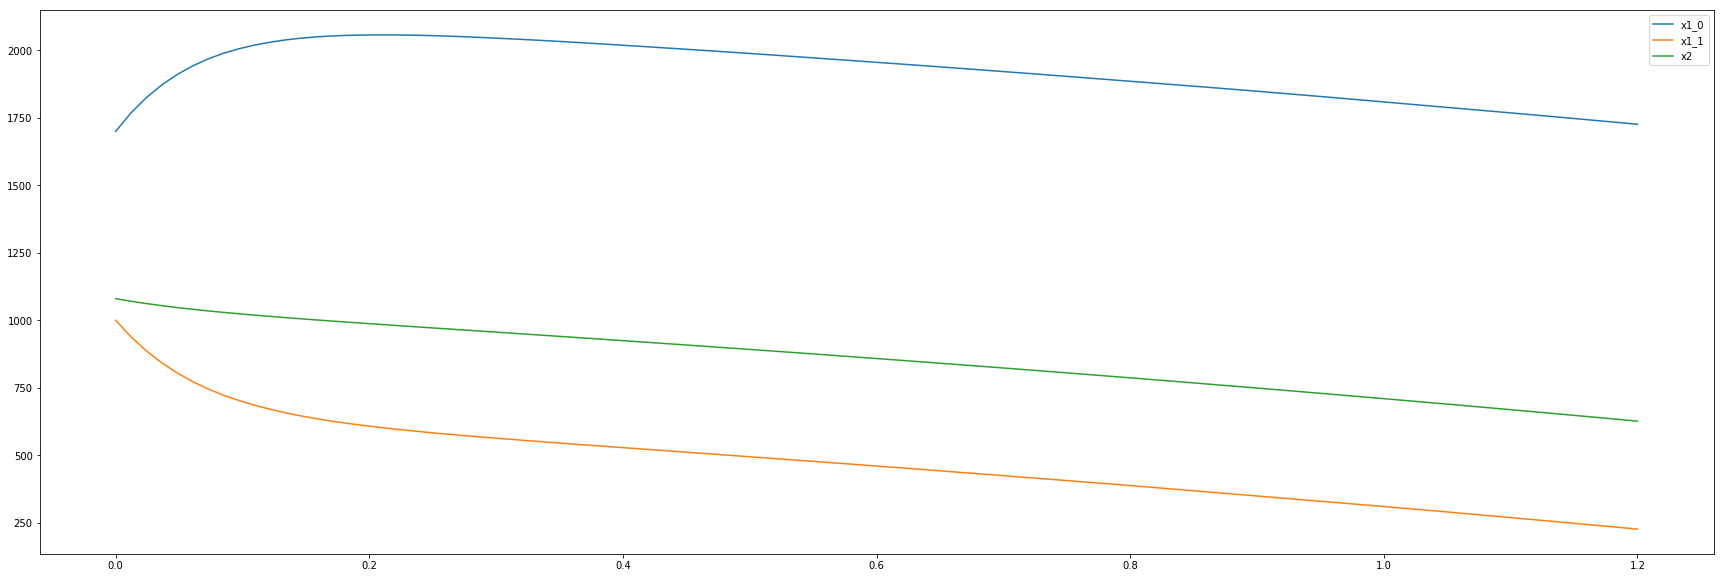

In [6]:
plt.figure(figsize=(30, 10))
plt.plot(t, x1[0], t, x1[1], t, x2[0])
plt.legend(['x1_0', 'x1_1', 'x2'])
plt.show()

## Closed ecosystem

$$ \frac{dy}{dt} = (E - A_1) B^{-1} y $$

In [7]:
def y_der(t, y):
    return (np.eye(A1.shape[0]) - A1) @ B_inv @ y

y1 = solve_ivp(y_der, bounds, x1_0.reshape(2), t_eval=t).y

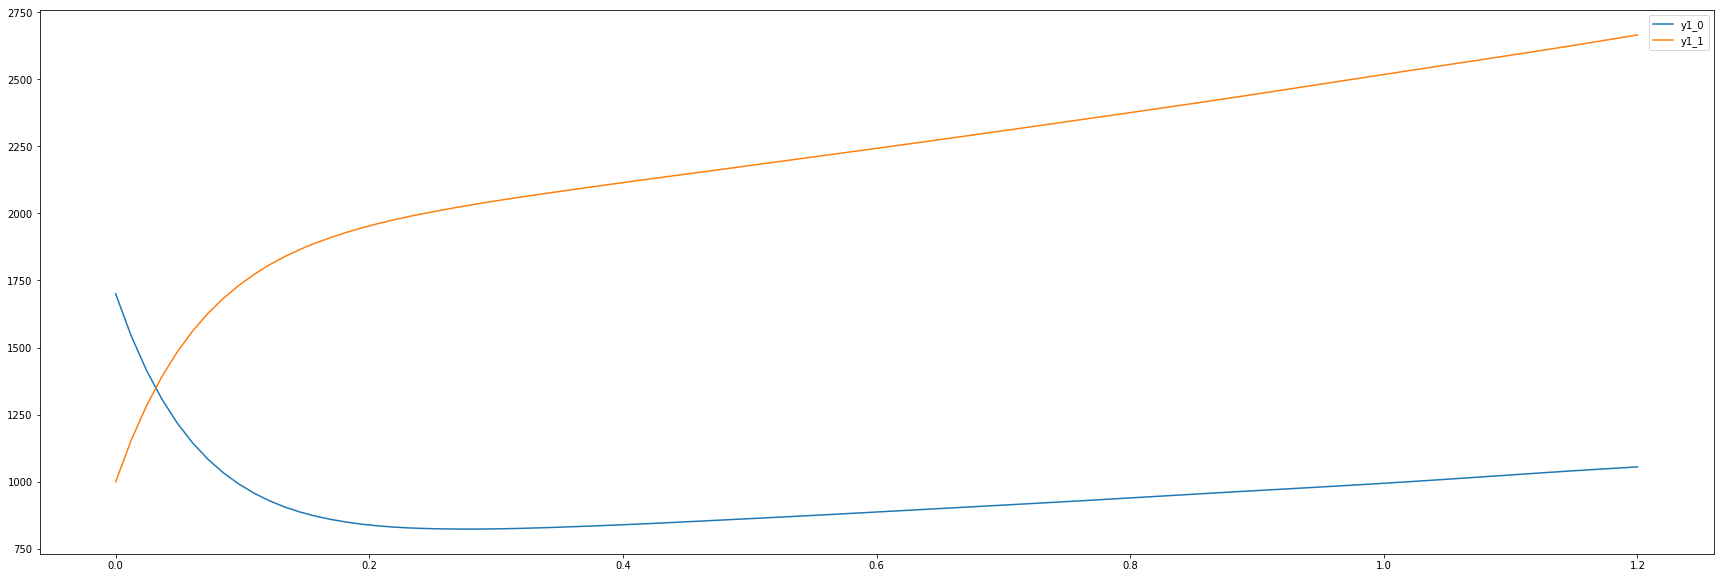

In [8]:
plt.figure(figsize=(30, 10))
plt.plot(t, y1[0], t, y1[1])
plt.legend(['y1_0', 'y1_1'])
plt.show()

In [9]:
eigen_values, vector = np.linalg.eig(A1_neg_inv @ B)
tech_growth = 1.0 / np.max(eigen_values)
print('Technology growth factor: {:.2f}'.format(tech_growth))

Technology growth factor: 0.29


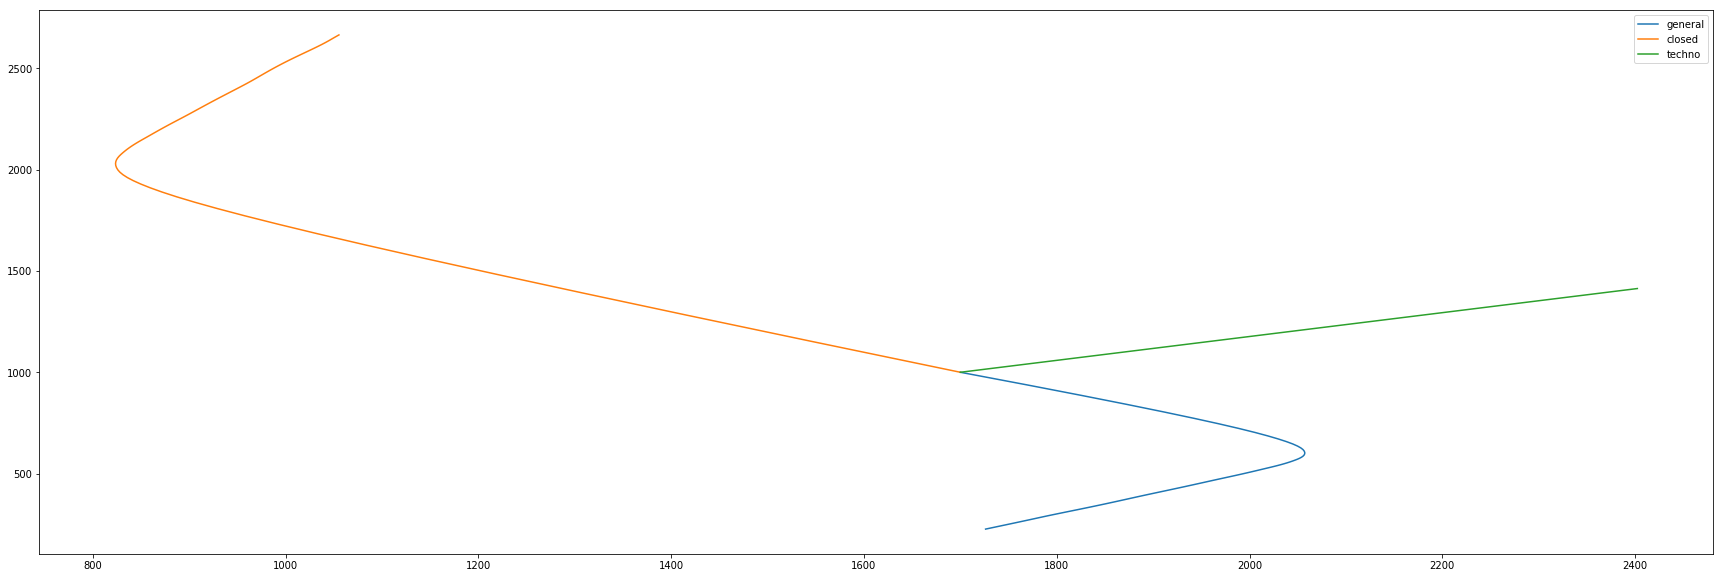

In [10]:
st = np.exp(tech_growth * t)

plt.figure(figsize=(30, 10))
plt.plot(x1[0], x1[1])
plt.plot(y1[0], y1[1])
plt.plot(st * 1700, st * 1000)
plt.legend(['general', 'closed', 'techno'])
plt.show()